In [1]:
import pandas as pd
import numpy as np

# # Simulating a dataset
# np.random.seed(42)

# # Generate random data
# data = {
#     'Airline': np.random.choice(['Delta', 'United', 'Southwest', 'American', 'Alaska'], size=1000),
#     'FlightNumber': np.random.randint(1000, 9999, size=1000),
#     'Date': pd.date_range('2023-01-01', periods=1000, freq='D'),
#     'Origin': np.random.choice(['JFK', 'LAX', 'ORD', 'DFW', 'ATL'], size=1000),
#     'Destination': np.random.choice(['JFK', 'LAX', 'ORD', 'DFW', 'ATL'], size=1000),
#     'Delay': np.random.randint(-30, 300, size=1000),  # Delays ranging from -30 (early) to 300 minutes
#     'ScheduledDeparture': np.random.randint(0, 1440, size=1000),  # Minutes since midnight
#     'WeatherDelay': np.random.randint(0, 120, size=1000)  # Weather delay in minutes
# }

# # Creating DataFrame
# flights_data = pd.DataFrame(data)

# # Display the first few rows of the dataset
# print(flights_data.head())

flights_data = pd.read_csv('airline_delays_dataset.csv')
print(flights_data)



       Airline  FlightNumber        Date Origin Destination  Delay  \
0     American          4531  2023-01-01    DFW         ORD    -11   
1       Alaska          8147  2023-01-02    ATL         ORD    190   
2    Southwest          5451  2023-01-03    DFW         LAX     92   
3       Alaska          4876  2023-01-04    DFW         LAX    203   
4       Alaska          6959  2023-01-05    DFW         ATL    190   
..         ...           ...         ...    ...         ...    ...   
995     United          2638  2025-09-22    ATL         ATL    -16   
996      Delta          6671  2025-09-23    ATL         LAX    -19   
997      Delta          7928  2025-09-24    ATL         LAX     70   
998   American          2382  2025-09-25    LAX         ATL    125   
999  Southwest          2403  2025-09-26    ATL         ATL     94   

     ScheduledDeparture  WeatherDelay  
0                   870            96  
1                   279            40  
2                   916            40  

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Grouping by Airline to sum the delays
airline_delays = flights_data.groupby('Airline')['Delay'].sum().reset_index()



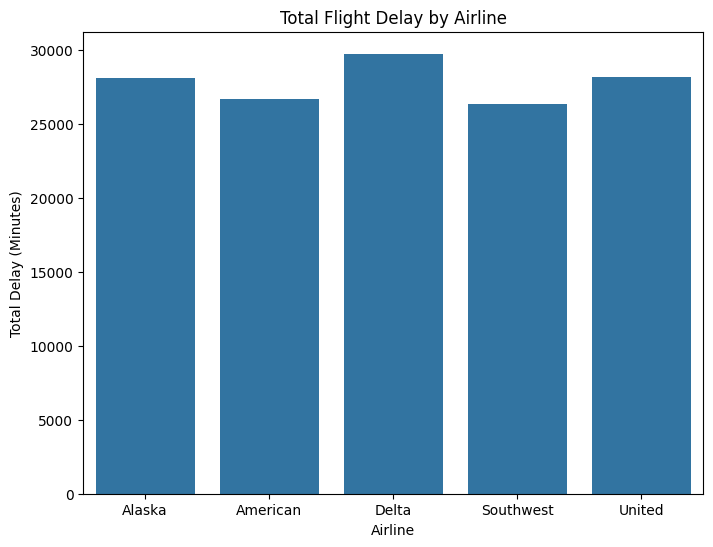

In [3]:
# Bar plot to show total delay by airline
plt.figure(figsize=(8, 6))
sns.barplot(x='Airline', y='Delay', data=airline_delays)
plt.title('Total Flight Delay by Airline')
plt.xlabel('Airline')
plt.ylabel('Total Delay (Minutes)')
plt.show()

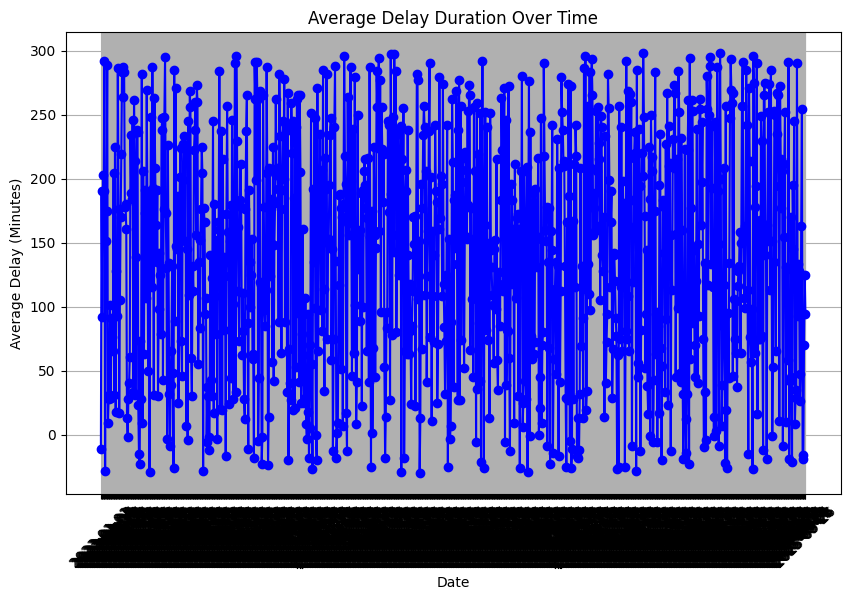

In [10]:
# Grouping by date to calculate average delay
daily_delays = flights_data.groupby('Date')['Delay'].mean().reset_index()

# Line plot for average delay over time
plt.figure(figsize=(10, 6))
plt.plot(daily_delays['Date'], daily_delays['Delay'], marker='o', color='b')
plt.title('Average Delay Duration Over Time')
plt.xlabel('Date')
plt.ylabel('Average Delay (Minutes)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


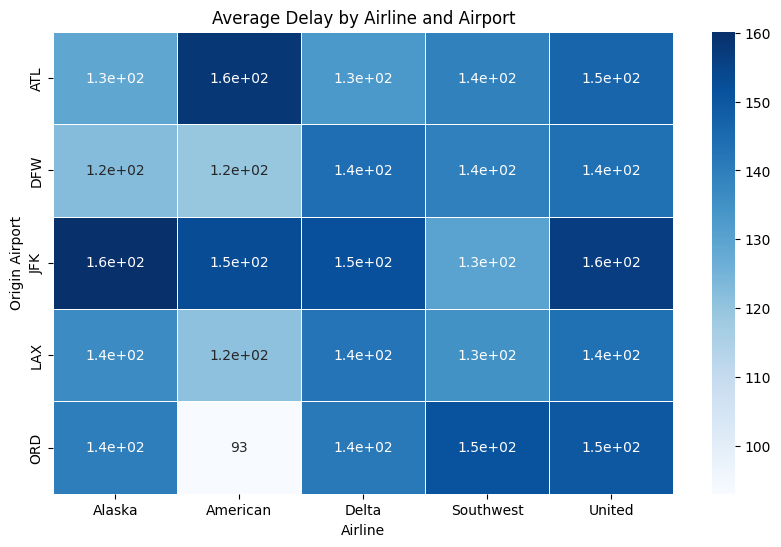

In [11]:
# Grouping by Airline and Origin to get average delay
airport_airline_delays = flights_data.groupby(['Origin', 'Airline'])['Delay'].mean().unstack()

# Heatmap for average delay by airline and airport
plt.figure(figsize=(10, 6))
sns.heatmap(airport_airline_delays, annot=True, cmap='Blues', linewidths=0.5)
plt.title('Average Delay by Airline and Airport')
plt.xlabel('Airline')
plt.ylabel('Origin Airport')
plt.show()


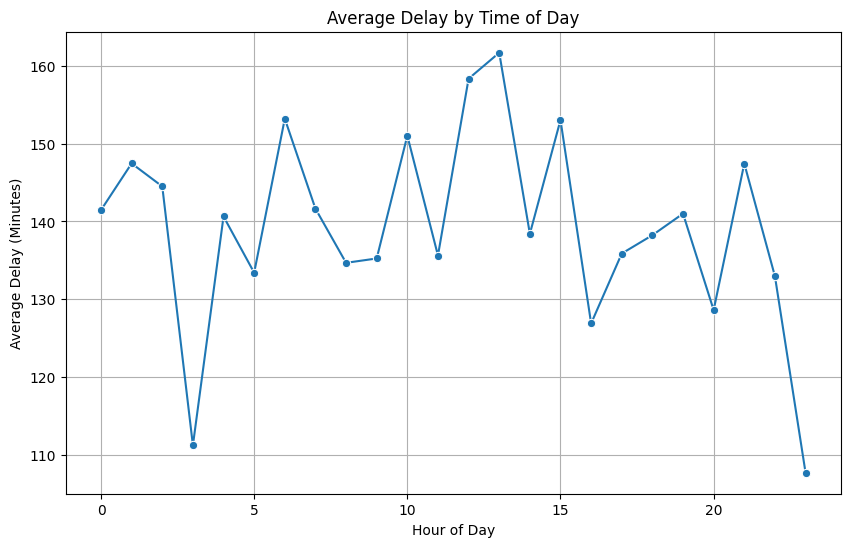

In [12]:
# Convert ScheduledDeparture from minutes since midnight to hour of day
flights_data['HourOfDay'] = flights_data['ScheduledDeparture'] // 60

# Group by HourOfDay to calculate average delay
hourly_delays = flights_data.groupby('HourOfDay')['Delay'].mean().reset_index()

# Line plot to show delay by time of day
plt.figure(figsize=(10, 6))
sns.lineplot(x='HourOfDay', y='Delay', data=hourly_delays, marker='o')
plt.title('Average Delay by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (Minutes)')
plt.grid(True)
plt.show()
